 BUILD A MULTI-LAYER PERCEPTRON NETWORK - MOON EXAMPLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import datasets

noisy_moons = datasets.make_moons(n_samples=1500, noise=.05)
X, y = noisy_moons

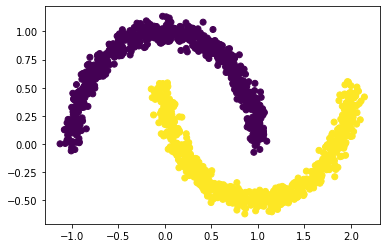

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)

scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)

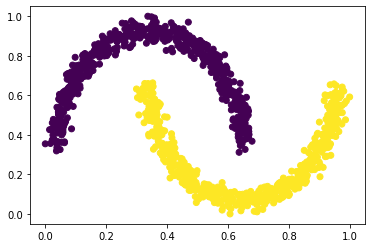

In [11]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)

In [12]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

Epoch 1/500
38/38 - 1s - loss: 0.7107 - 1s/epoch - 31ms/step
Epoch 2/500
38/38 - 0s - loss: 0.7040 - 93ms/epoch - 2ms/step
Epoch 3/500
38/38 - 0s - loss: 0.6976 - 83ms/epoch - 2ms/step
Epoch 4/500
38/38 - 0s - loss: 0.6914 - 84ms/epoch - 2ms/step
Epoch 5/500
38/38 - 0s - loss: 0.6853 - 94ms/epoch - 2ms/step
Epoch 6/500
38/38 - 0s - loss: 0.6792 - 83ms/epoch - 2ms/step
Epoch 7/500
38/38 - 0s - loss: 0.6733 - 74ms/epoch - 2ms/step
Epoch 8/500
38/38 - 0s - loss: 0.6675 - 53ms/epoch - 1ms/step
Epoch 9/500
38/38 - 0s - loss: 0.6618 - 51ms/epoch - 1ms/step
Epoch 10/500
38/38 - 0s - loss: 0.6562 - 63ms/epoch - 2ms/step
Epoch 11/500
38/38 - 0s - loss: 0.6506 - 53ms/epoch - 1ms/step
Epoch 12/500
38/38 - 0s - loss: 0.6452 - 55ms/epoch - 1ms/step
Epoch 13/500
38/38 - 0s - loss: 0.6398 - 58ms/epoch - 2ms/step
Epoch 14/500
38/38 - 0s - loss: 0.6345 - 53ms/epoch - 1ms/step
Epoch 15/500
38/38 - 0s - loss: 0.6292 - 52ms/epoch - 1ms/step
Epoch 16/500
38/38 - 0s - loss: 0.6240 - 54ms/epoch - 1ms/step
Ep

## Try another model structure

In [13]:
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

Epoch 1/500
38/38 - 1s - loss: 0.6251 - 724ms/epoch - 19ms/step
Epoch 2/500
38/38 - 0s - loss: 0.4556 - 63ms/epoch - 2ms/step
Epoch 3/500
38/38 - 0s - loss: 0.3226 - 66ms/epoch - 2ms/step
Epoch 4/500
38/38 - 0s - loss: 0.2795 - 68ms/epoch - 2ms/step
Epoch 5/500
38/38 - 0s - loss: 0.2656 - 62ms/epoch - 2ms/step
Epoch 6/500
38/38 - 0s - loss: 0.2587 - 67ms/epoch - 2ms/step
Epoch 7/500
38/38 - 0s - loss: 0.2509 - 62ms/epoch - 2ms/step
Epoch 8/500
38/38 - 0s - loss: 0.2473 - 60ms/epoch - 2ms/step
Epoch 9/500
38/38 - 0s - loss: 0.2401 - 64ms/epoch - 2ms/step
Epoch 10/500
38/38 - 0s - loss: 0.2383 - 81ms/epoch - 2ms/step
Epoch 11/500
38/38 - 0s - loss: 0.2361 - 65ms/epoch - 2ms/step
Epoch 12/500
38/38 - 0s - loss: 0.2281 - 62ms/epoch - 2ms/step
Epoch 13/500
38/38 - 0s - loss: 0.2249 - 62ms/epoch - 2ms/step
Epoch 14/500
38/38 - 0s - loss: 0.2208 - 62ms/epoch - 2ms/step
Epoch 15/500
38/38 - 0s - loss: 0.2143 - 66ms/epoch - 2ms/step
Epoch 16/500
38/38 - 0s - loss: 0.2103 - 61ms/epoch - 2ms/step

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

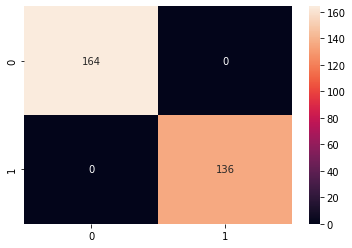

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       136

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


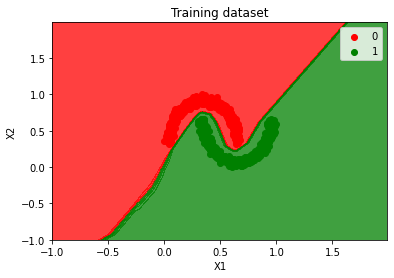

In [18]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [19]:
weights, biases = model.layers[0].get_weights()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


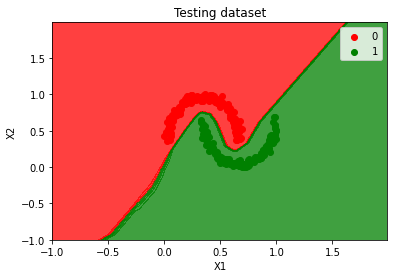

In [20]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()